In [ ]:
import os.path
import cv2 as cv
import numpy as np
from random import randrange
from matplotlib import pyplot as plt
from matplotlib.patches import ConnectionPatch
%matplotlib inline

In [ ]:

class Image:
    def __init__(self, path):

            if os.path.isfile(path):
                self.path = path
            else:
                raise ValueError(f"{path} is not a valid image.")

# OpenCV has it's own methods of redendring results, but let's add more control
# by creating our own. 
def FormatPlot(*argv):
    # Turn off axis lines and ticks of the subplot
    for arg in argv:
        arg.spines['top'].set_color('none')
        arg.spines['bottom'].set_color('none')
        arg.spines['left'].set_color('none')
        arg.spines['right'].set_color('none')
        arg.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

def DrawImagePairs(img0, img1):
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    # Turn off axis lines and ticks of the subplots
    FormatPlot(ax1, ax2)

    ax1.imshow(img0)
    ax2.imshow(img1)

def DrawKeypointPairs(img1, img2, keypoints1, keypoints2):
    
    ptx = []
    pty = []
    for keypoint in keypoints1:
        x,y = keypoint.pt
        ptx.append(x)
        pty.append(y)
    
    ptx0 = []
    pty0 = []
    for keypoint in keypoints2:
        x,y = keypoint.pt
        ptx0.append(x)
        pty0.append(y)    

    # Plot the images with their keypoints.
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    FormatPlot(ax1, ax2)

    ax1.scatter(x=ptx, y=pty, color=(0,1,0), s=40, marker="x")
    ax2.scatter(x=ptx0, y=pty0, color=(0,1,0), s=40, marker="x")
    ax1.imshow(img1)
    ax2.imshow(img2)
    
def DrawMatches(img1, img2, keypoints1, keypoints2, img1_matches):
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    FormatPlot(ax1, ax2)

    for match in img1_matches:
        kp0 = keypoints1[match.queryIdx]
        kp1 = keypoints2[match.trainIdx]

        con = ConnectionPatch(xyA=kp1.pt, xyB=kp0.pt, coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1, color=(0,1,0), linewidth=2.0)

        ax2.add_artist(con)

    ax1.imshow(img1)
    ax2.imshow(img2)
    
def DrawDescriptorPairs(img1, img2, k1, k2, ds1, ds2):
    fig = plt.figure(figsize=(30, 7))
    gs = fig.add_gridspec(2, 4)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[:, 1])
    ax4 = fig.add_subplot(gs[:, 2])
    ax5 = fig.add_subplot(gs[0, 3])
    ax6 = fig.add_subplot(gs[1, 3])

    FormatPlot(ax2, ax3, ax4, ax6)
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    ax1.hist(ds1, density=False, bins=36)
    ax2.imshow(img1)
    ax3.imshow(img1, aspect='auto')
    ax3.scatter(x=kp1.pt[0], y=kp1.pt[1], color=(0,1,0), s=200, marker="X")
    ax4.imshow(img2, aspect='auto')
    ax4.scatter(x=kp2.pt[0], y=kp2.pt[1], color=(0,1,0), s=200, marker="X")
    ax5.hist(ds2, density=False, bins=36)
    ax6.imshow(img2)

    # Draw connection path between matches.
    con = ConnectionPatch(xyA=kp2.pt, xyB=kp1.pt, coordsA="data", coordsB="data",
                              axesA=ax4, axesB=ax3, color=(0,1,0), linewidth=2.0)
    ax4.add_artist(con)

In [ ]:
# Import and draw a couple of images.
image1 = Image(r"..\Images\cat.jpg")
image2 = Image(r"..\Images\cat_train.jpg")

image1.color = cv.imread(image1.path)
image2.color = cv.imread(image2.path)

DrawImagePairs(
    cv.cvtColor(image1.color, cv.COLOR_BGR2RGB), 
    cv.cvtColor(image2.color, cv.COLOR_BGR2RGB))

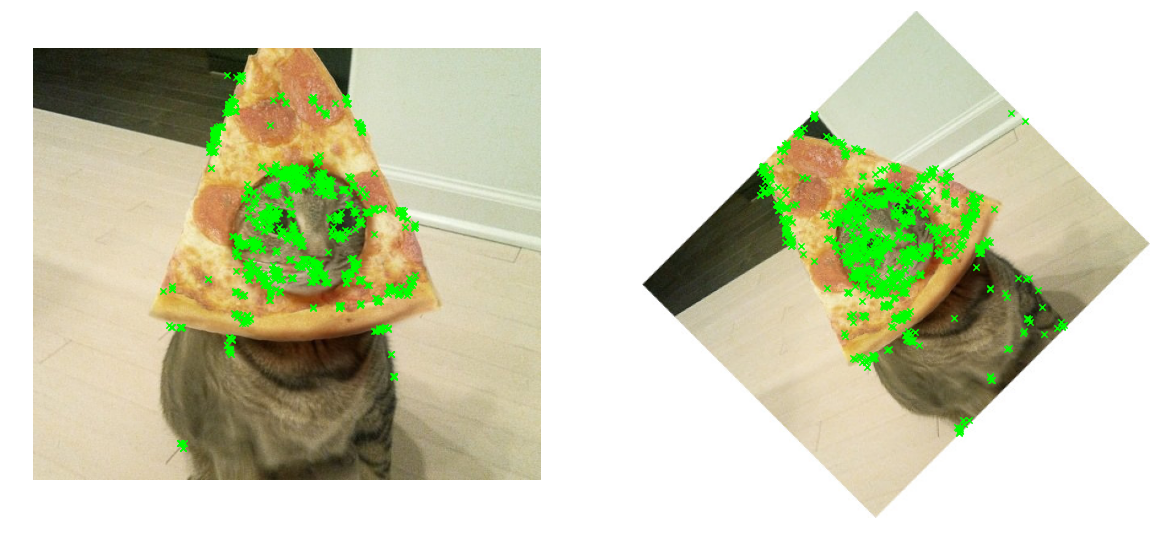

In [14]:

detector = cv.ORB_create(1000)

image1.gray = cv.cvtColor(image1.color, cv.COLOR_BGR2GRAY)
image2.gray = cv.cvtColor(image2.color, cv.COLOR_BGR2GRAY)
        
image1.keypoints, image1.descriptors = detector.detectAndCompute(image1.gray, None)
image2.keypoints, image2.descriptors = detector.detectAndCompute(image2.gray, None)

DrawKeypointPairs(cv.cvtColor(image1.color, cv.COLOR_BGR2RGB), 
                  cv.cvtColor(image2.color, cv.COLOR_BGR2RGB), 
                  image1.keypoints, 
                  image2.keypoints)

In [16]:
# Create BFMatcher object.
bf = cv.BFMatcher.create(cv.NORM_L2 , crossCheck=True)

image1.matches = bf.match(image1.descriptors, image2.descriptors)
# Sort them in the order of their distance.
image1.matches = sorted(image1.matches, key = lambda x:x.distance)
print(f"...found {len(image1.matches)}")

...found 367


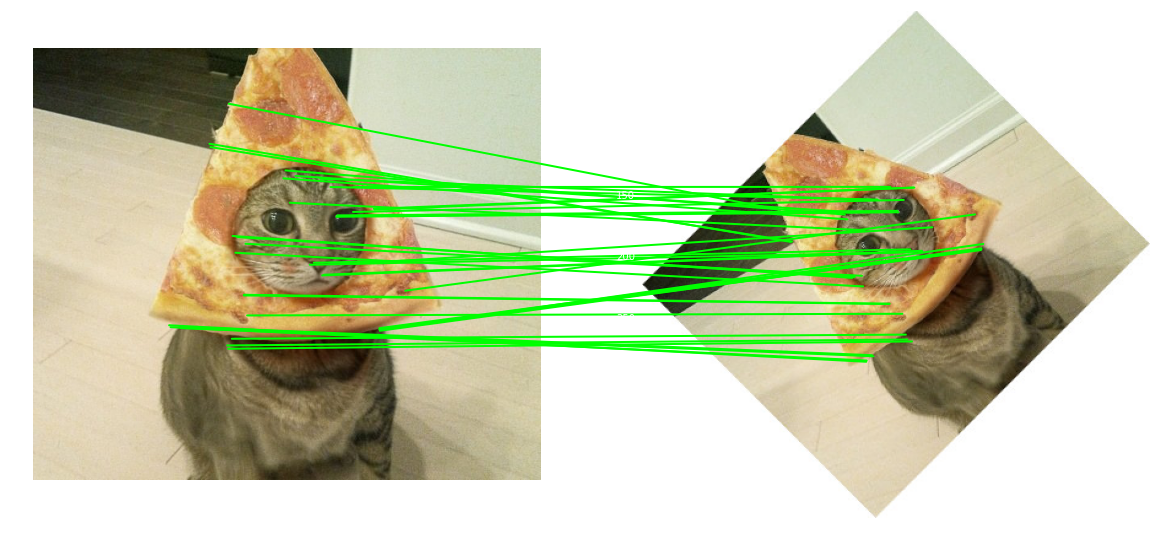

In [20]:
# Draw some matches
DrawMatches(cv.cvtColor(image1.color, cv.COLOR_BGR2RGB), 
            cv.cvtColor(image2.color, cv.COLOR_BGR2RGB), 
            image1.keypoints, 
            image2.keypoints, 
            image1.matches[:40])

#plt.savefig('cat.png')